<a href="https://colab.research.google.com/github/surya-teja0518/e-commerce_website/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce Customer Churn Prediction & Retention Strategy

## Project Overview

This project aims to predict customer churn in a simulated e-commerce business and develop data-driven strategies to reduce churn and improve customer lifetime value. It demonstrates an end-to-end analytical process, from data generation and exploration to machine learning model deployment and strategic recommendation.

**Core Competencies Demonstrated:**

* **Experience in analytics/data science:** Covered by the entire project lifecycle.
* **Hands-on experience on data manipulation tools like SQL, R, Python, Excel:** Demonstrated heavily through Python (pandas) for data manipulation, cleaning, and feature engineering.
* **Exposure to BI Platforms like Power BI, Tableau:** Conceptualized in the "Business Insights & Strategy" section for reporting.
* **Knowledge of basic statistical measurement frameworks:** Applied in EDA (measures of central tendency, dispersion, distribution, correlation) and experiment design (significance testing).
* **Basic knowledge of machine learning techniques like Regression, Classification:** Utilized Classification models (Logistic Regression, Random Forest, Gradient Boosting) for churn prediction.

## Project Structure

The project is structured into the following key phases:

1.  **Project Setup & Data Acquisition:** Setting up the environment and generating a synthetic e-commerce dataset.
2.  **Exploratory Data Analysis (EDA) & Feature Engineering:** Understanding the data, deriving new features, and visualizing key relationships.
3.  **Predictive Modeling (Machine Learning):** Building, training, and evaluating classification models to predict churn.
4.  **Business Insights & Strategy Recommendation:** Interpreting model results, formulating actionable retention strategies, and outlining experimentation frameworks.

## Setup and Running the Project

### Prerequisites

* Python 3.8+
* Jupyter Notebook (recommended for interactive exploration) or a Python IDE.
* Required Python libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`.

### Installation

You can install the necessary libraries using pip:

```bash

```
### This is formatted as code
```


pip install pandas numpy matplotlib seaborn scikit-learn


In [15]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Set a random seed for reproducibility
np.random.seed(42)

# Define number of customers
num_customers = 5000

# Generate Customer IDs
customer_ids = [f'CUST_{i:05d}' for i in range(num_customers)]

# Generate Registration Dates (last 2 years)
end_date = datetime(2025, 7, 14) # Today's date (relative to project creation)
start_date = end_date - timedelta(days=730)
registration_dates = [start_date + timedelta(days=np.random.randint(0, 730)) for _ in range(num_customers)]

# Generate Last Purchase Dates (can be recent or old)
last_purchase_dates = []
for reg_date in registration_dates:
    last_purchase_dates.append(reg_date + timedelta(days=np.random.randint(0, (end_date - reg_date).days + 1)))

# Generate Total Orders
total_orders = np.random.randint(1, 30, num_customers)

# Generate Average Order Value
avg_order_value = np.random.uniform(20, 500, num_customers)

# Generate Total Spend
total_spend = total_orders * avg_order_value

# Generate Website Visits (last 30 days)
website_visits_30_days = np.random.randint(0, 50, num_customers)

# Generate Customer Service Interactions (last 90 days)
customer_service_interactions_90_days = np.random.randint(0, 10, num_customers)

# Generate Product Returns (lifetime)
product_returns_lifetime = np.random.randint(0, 5, num_customers)

# Generate Newsletter Subscription
newsletter_subscription = np.random.choice([True, False], num_customers, p=[0.7, 0.3])

# Generate Device Type
device_type = np.random.choice(['Mobile', 'Desktop', 'Tablet'], num_customers, p=[0.6, 0.3, 0.1])

# Generate Customer Segment (e.g., New, Regular, VIP - can be inferred later but useful for initial features)
customer_segment = np.random.choice(['New', 'Regular', 'VIP'], num_customers, p=[0.3, 0.5, 0.2])

# Generate a 'Churn' label (simplistic for now, will refine later)
# Churn defined as no purchase in the last 60 days
churn_status = []
for lp_date in last_purchase_dates:
    if (end_date - lp_date).days > 60:
        churn_status.append(1) # Churned
    else:
        churn_status.append(0) # Not Churned

# Create DataFrame
data = pd.DataFrame({
    'customer_id': customer_ids,
    'registration_date': registration_dates,
    'last_purchase_date': last_purchase_dates,
    'total_orders': total_orders,
    'avg_order_value': avg_order_value,
    'total_spend': total_spend,
    'website_visits_30_days': website_visits_30_days,
    'customer_service_interactions_90_days': customer_service_interactions_90_days,
    'product_returns_lifetime': product_returns_lifetime,
    'newsletter_subscription': newsletter_subscription,
    'device_type': device_type,
    'customer_segment': customer_segment,
    'churn': churn_status
})

# Add Recency (days since last purchase)
data['recency'] = (end_date - data['last_purchase_date']).dt.days

# Add Tenure (days since registration)
data['tenure'] = (end_date - data['registration_date']).dt.days

# Display head of the dataset
print(data.head())
print(data.info())

  customer_id registration_date last_purchase_date  total_orders  \
0  CUST_00000        2023-10-25         2023-11-24            26   
1  CUST_00001        2024-09-22         2024-10-02            19   
2  CUST_00002        2024-04-10         2025-02-05            24   
3  CUST_00003        2023-10-29         2024-02-01            26   
4  CUST_00004        2023-09-24         2024-03-31            13   

   avg_order_value   total_spend  website_visits_30_days  \
0        91.922304   2389.979915                      19   
1       146.701210   2787.322990                      14   
2       474.961712  11399.081086                      32   
3       196.223761   5101.817785                      16   
4       455.687334   5923.935338                      19   

   customer_service_interactions_90_days  product_returns_lifetime  \
0                                      1                         4   
1                                      3                         1   
2                   

In [16]:
# Feature Engineering - RFM is mostly done. Let's add a few more.

# Returns per Order (to see if customers with high return rates churn)
data['returns_per_order'] = data['product_returns_lifetime'] / data['total_orders']
data['returns_per_order'] = data['returns_per_order'].fillna(0) # Handle cases with 0 orders

# Engagement Score (simple composite from website visits and customer service interactions)
data['engagement_score'] = data['website_visits_30_days'] - (data['customer_service_interactions_90_days'] * 0.5)
# Note: This is a simplistic score, in a real scenario, you'd refine it.

print("\nFeatures after engineering:")
print(data[['customer_id', 'recency', 'tenure', 'returns_per_order', 'engagement_score', 'churn']].head())


Features after engineering:
  customer_id  recency  tenure  returns_per_order  engagement_score  churn
0  CUST_00000      598     628           0.153846              18.5      1
1  CUST_00001      285     295           0.052632              12.5      1
2  CUST_00002      159     460           0.083333              30.0      1
3  CUST_00003      529     624           0.076923              15.5      1
4  CUST_00004      470     659           0.307692              15.5      1



Overall Churn Rate: 70.72%


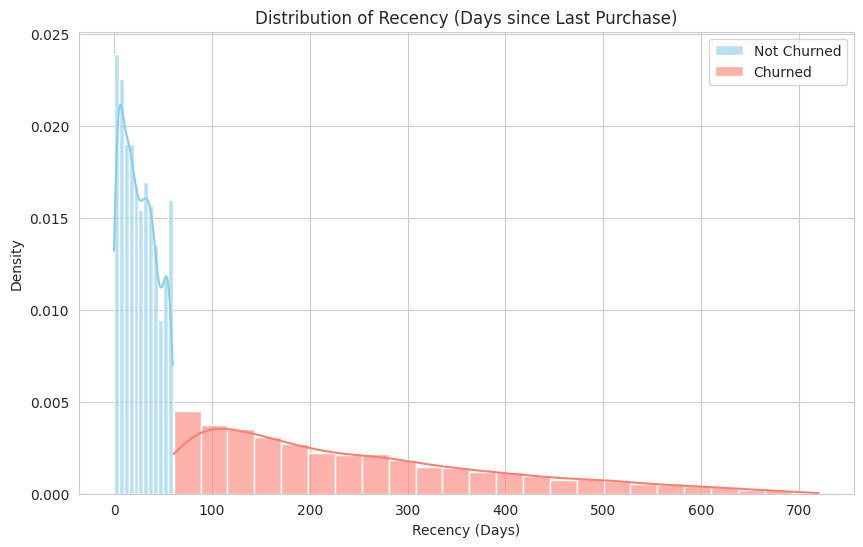

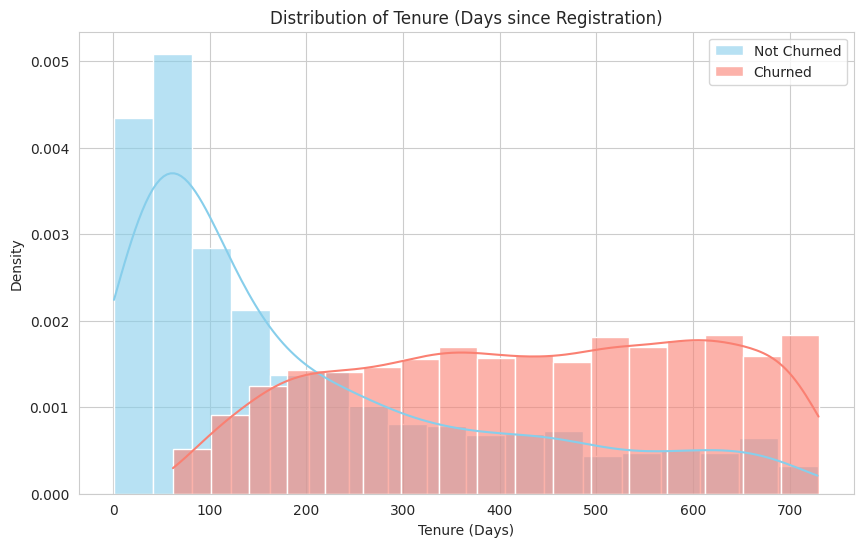

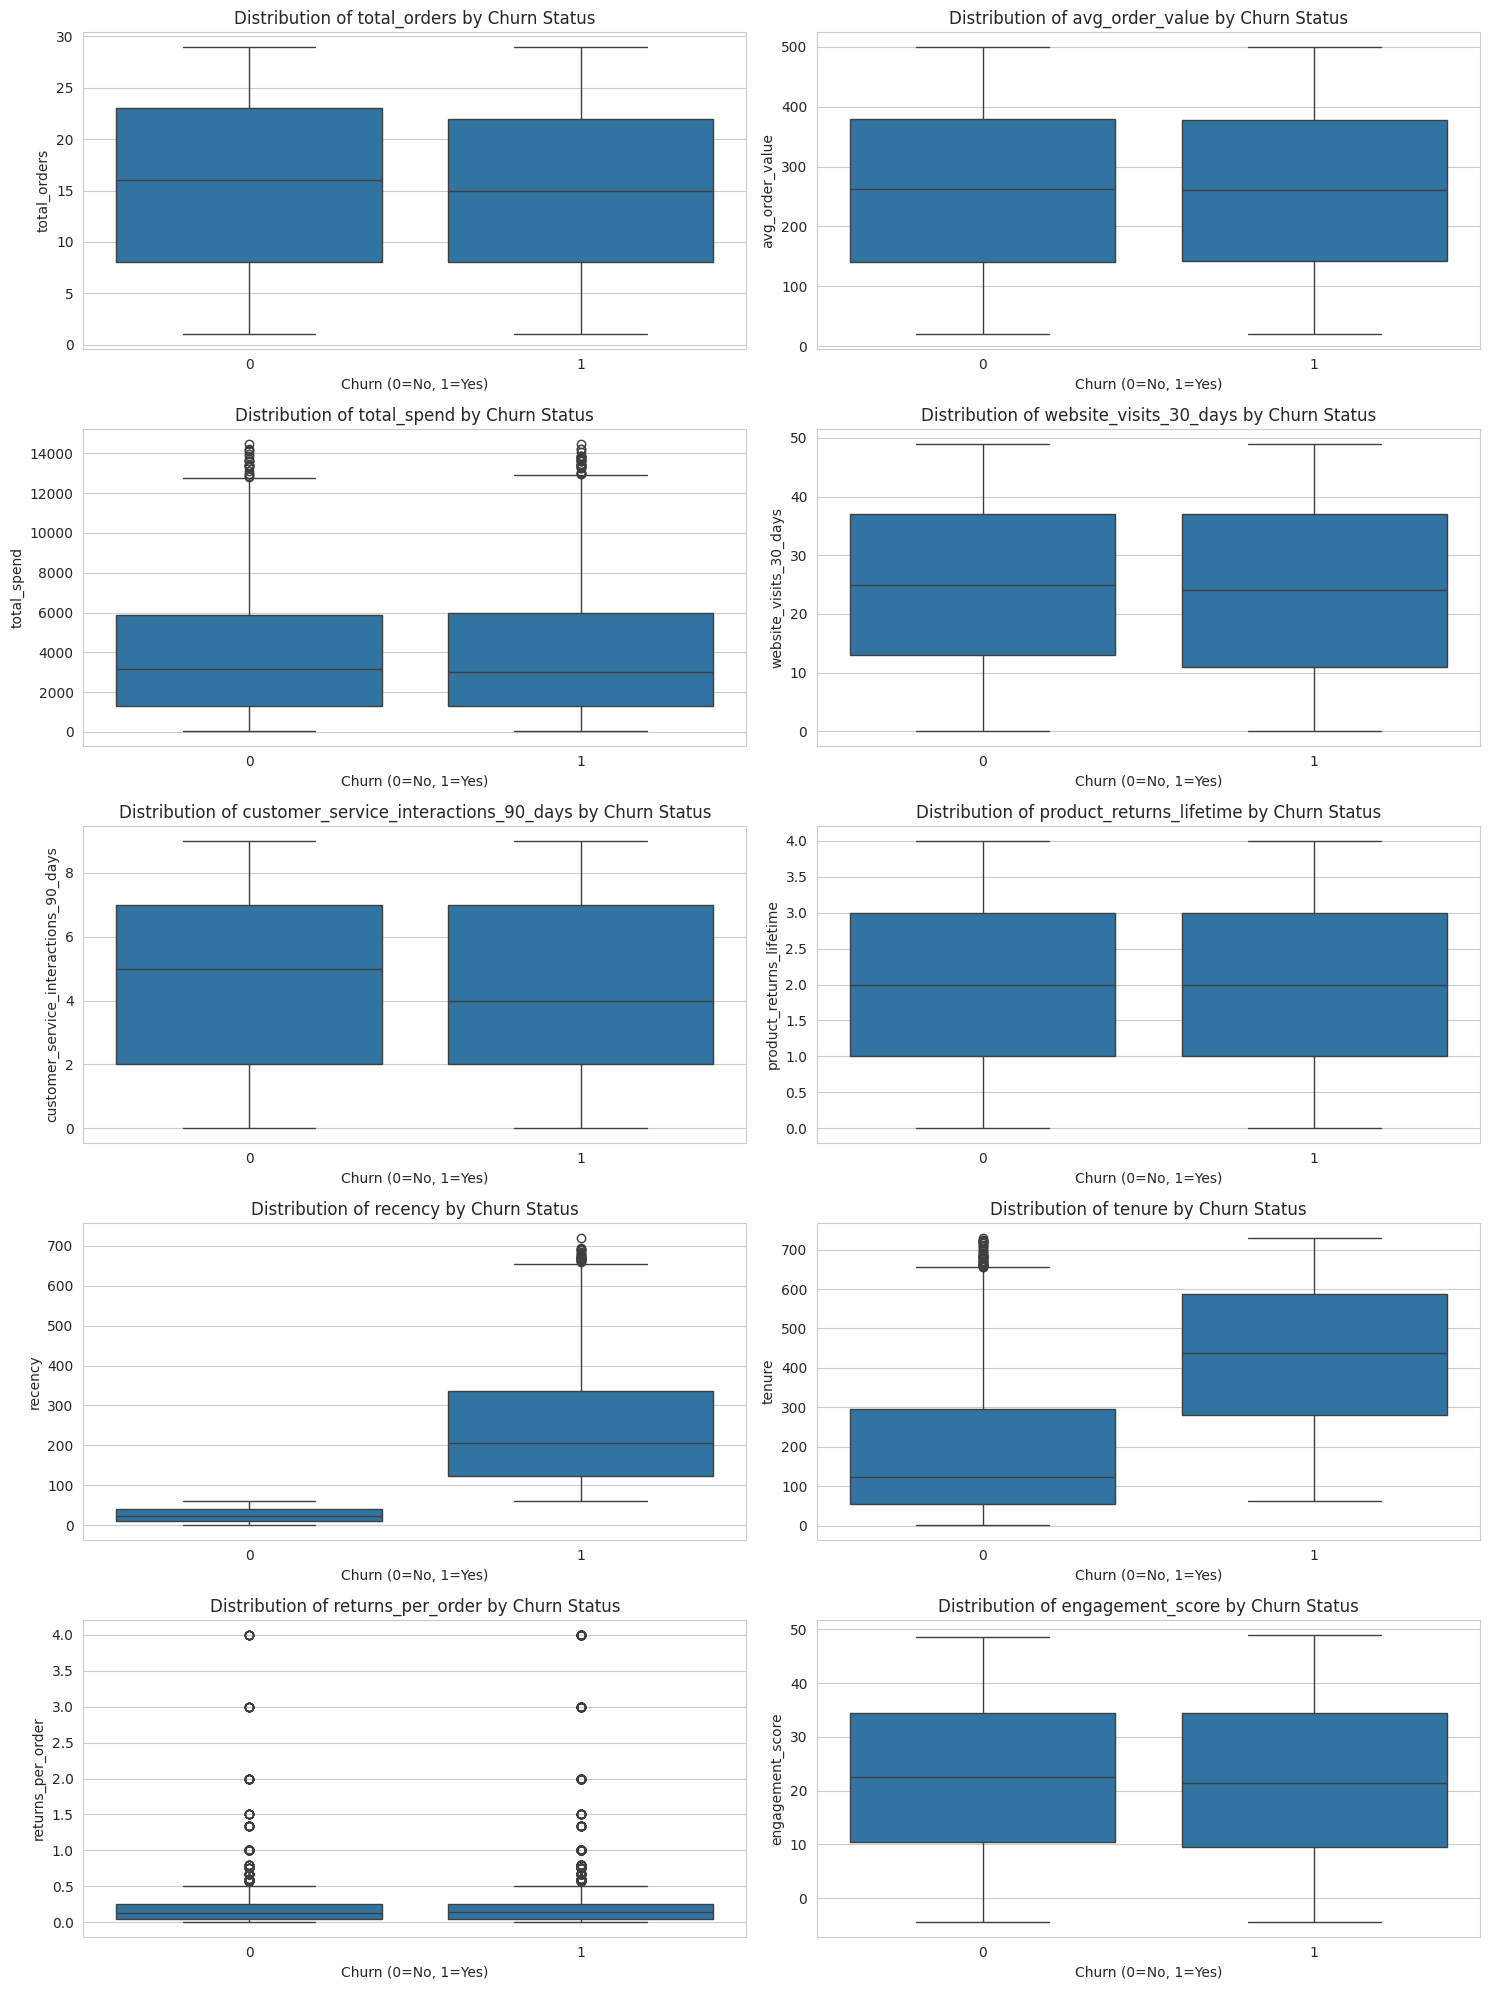

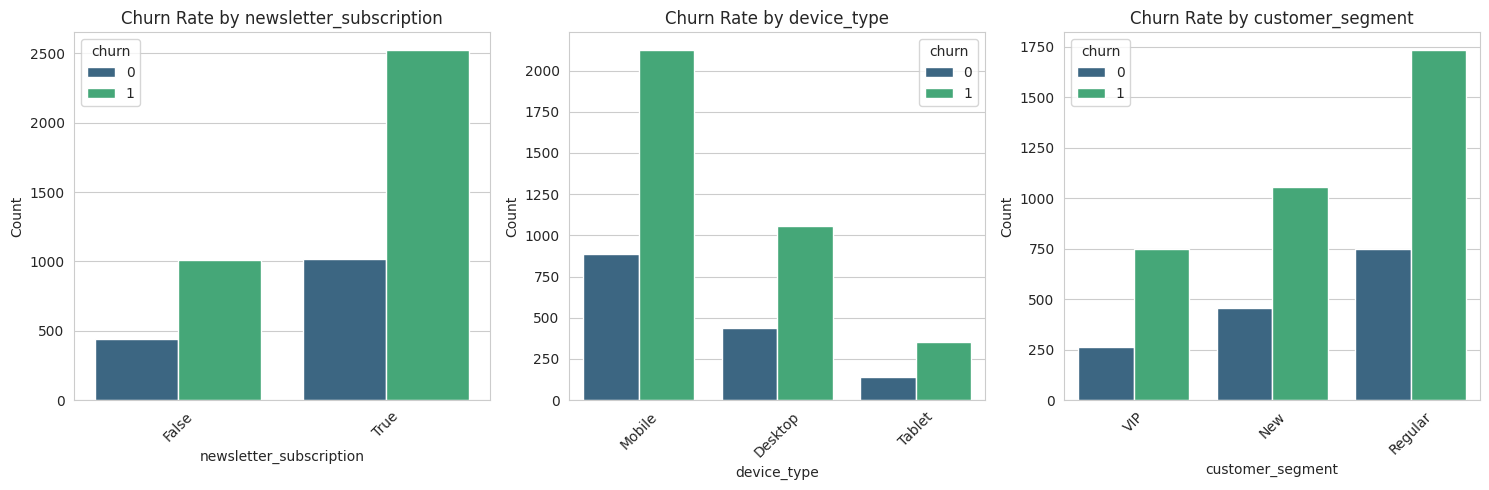

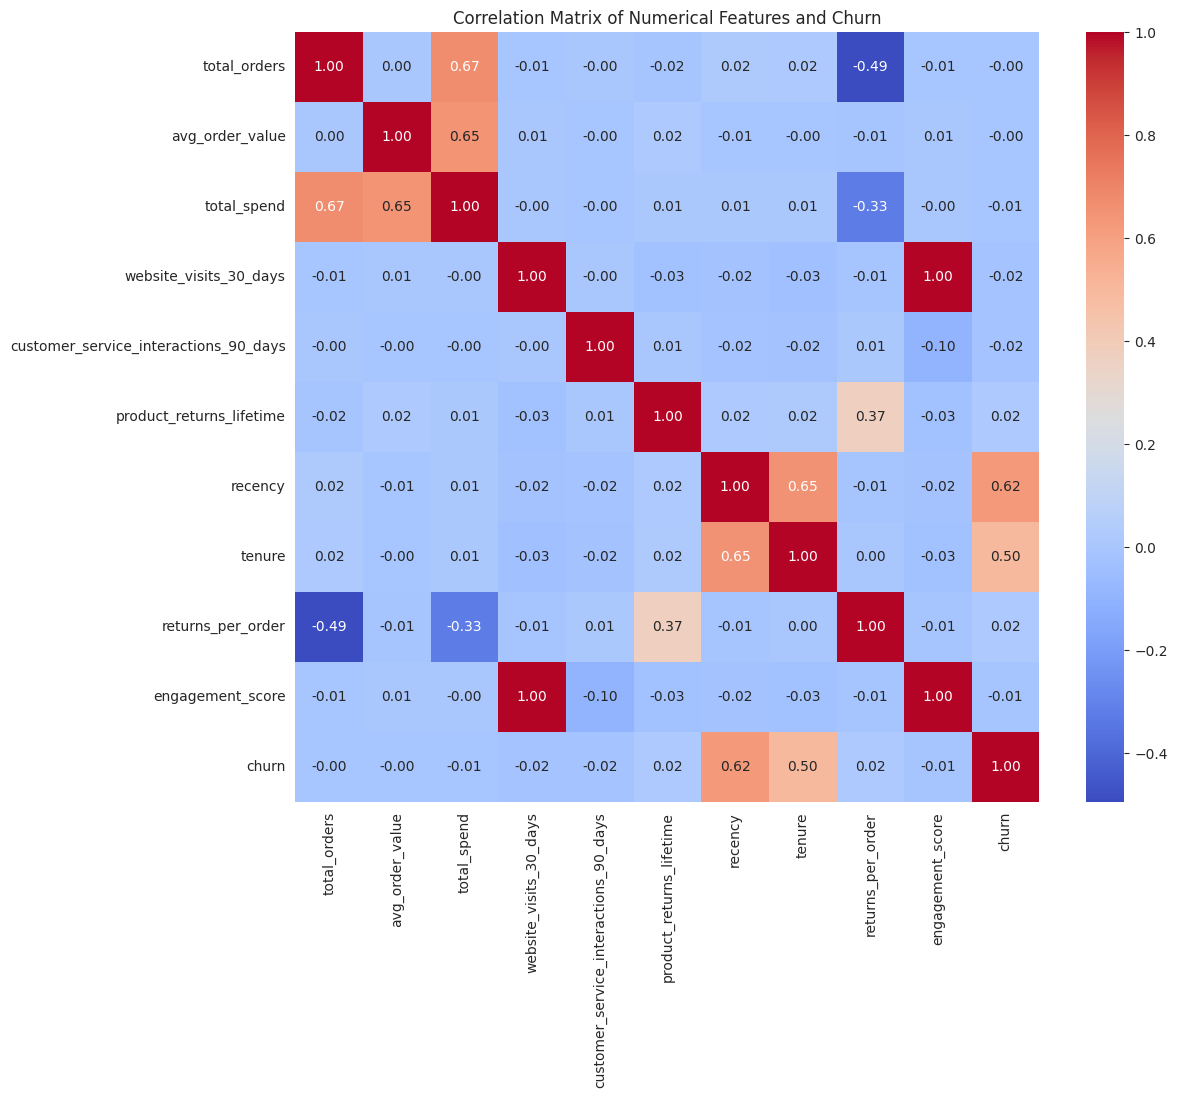

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Churn Rate
churn_rate = data['churn'].mean() * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

# Distribution of 'Recency' for churned vs. non-churned
plt.figure(figsize=(10, 6))
sns.histplot(data[data['churn'] == 0]['recency'], color='skyblue', label='Not Churned', kde=True, stat='density', alpha=0.6)
sns.histplot(data[data['churn'] == 1]['recency'], color='salmon', label='Churned', kde=True, stat='density', alpha=0.6)
plt.title('Distribution of Recency (Days since Last Purchase)')
plt.xlabel('Recency (Days)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Distribution of 'Tenure' for churned vs. non-churned
plt.figure(figsize=(10, 6))
sns.histplot(data[data['churn'] == 0]['tenure'], color='skyblue', label='Not Churned', kde=True, stat='density', alpha=0.6)
sns.histplot(data[data['churn'] == 1]['tenure'], color='salmon', label='Churned', kde=True, stat='density', alpha=0.6)
plt.title('Distribution of Tenure (Days since Registration)')
plt.xlabel('Tenure (Days)')
plt.ylabel('Density')
plt.legend()
plt.show()

# Compare numerical features by churn status using box plots
numerical_cols = ['total_orders', 'avg_order_value', 'total_spend',
                  'website_visits_30_days', 'customer_service_interactions_90_days',
                  'product_returns_lifetime', 'recency', 'tenure', 'returns_per_order', 'engagement_score']

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x='churn', y=col, data=data)
    plt.title(f'Distribution of {col} by Churn Status')
    plt.xlabel('Churn (0=No, 1=Yes)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Compare categorical features by churn status using count plots
categorical_cols = ['newsletter_subscription', 'device_type', 'customer_segment']

plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=col, hue='churn', data=data, palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Matrix (for numerical features)
plt.figure(figsize=(12, 10))
sns.heatmap(data[numerical_cols + ['churn']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Define features (X) and target (y)
features = ['recency', 'tenure', 'total_orders', 'avg_order_value', 'total_spend',
            'website_visits_30_days', 'customer_service_interactions_90_days',
            'product_returns_lifetime', 'returns_per_order', 'engagement_score',
            'newsletter_subscription', 'device_type', 'customer_segment']
target = 'churn'

X = data[features]
y = data[target]

# Identify numerical and categorical columns
numerical_features = ['recency', 'tenure', 'total_orders', 'avg_order_value', 'total_spend',
                      'website_visits_30_days', 'customer_service_interactions_90_days',
                      'product_returns_lifetime', 'returns_per_order', 'engagement_score']
categorical_features = ['newsletter_subscription', 'device_type', 'customer_segment']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (4000, 13)
X_test shape: (1000, 13)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Option 1: Logistic Regression
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(solver='liblinear', random_state=42))])
model_lr.fit(X_train, y_train)

# Option 2: Random Forest Classifier
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
model_rf.fit(X_train, y_train)

# Option 3: Gradient Boosting Classifier
model_gb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))])
model_gb.fit(X_train, y_train)

print("Models trained successfully!")

Models trained successfully!



--- Logistic Regression Model Evaluation ---
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       293
           1       1.00      0.99      1.00       707

    accuracy                           0.99      1000
   macro avg       0.99      1.00      0.99      1000
weighted avg       0.99      0.99      0.99      1000

Confusion Matrix:
 [[293   0]
 [  7 700]]
ROC AUC Score: 1.00


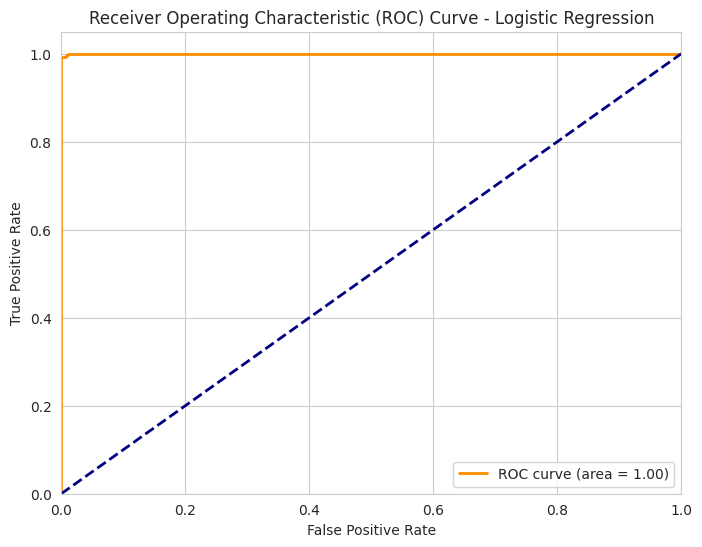


--- Random Forest Model Evaluation ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       707

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[293   0]
 [  0 707]]
ROC AUC Score: 1.00

--- Gradient Boosting Model Evaluation ---
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00       707

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[293   0]
 [  0 707]]
ROC AUC Score: 1.00


In [13]:
# Evaluate Logistic Regression
print("\n--- Logistic Regression Model Evaluation ---")
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f"ROC AUC Score: {roc_auc_lr:.2f}")

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Evaluate Random Forest
print("\n--- Random Forest Model Evaluation ---")
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print(f"ROC AUC Score: {roc_auc_rf:.2f}")

# Evaluate Gradient Boosting
print("\n--- Gradient Boosting Model Evaluation ---")
y_pred_gb = model_gb.predict(X_test)
y_prob_gb = model_gb.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print(f"ROC AUC Score: {roc_auc_gb:.2f}")

/tmp/ipython-input-14-1381401890.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')


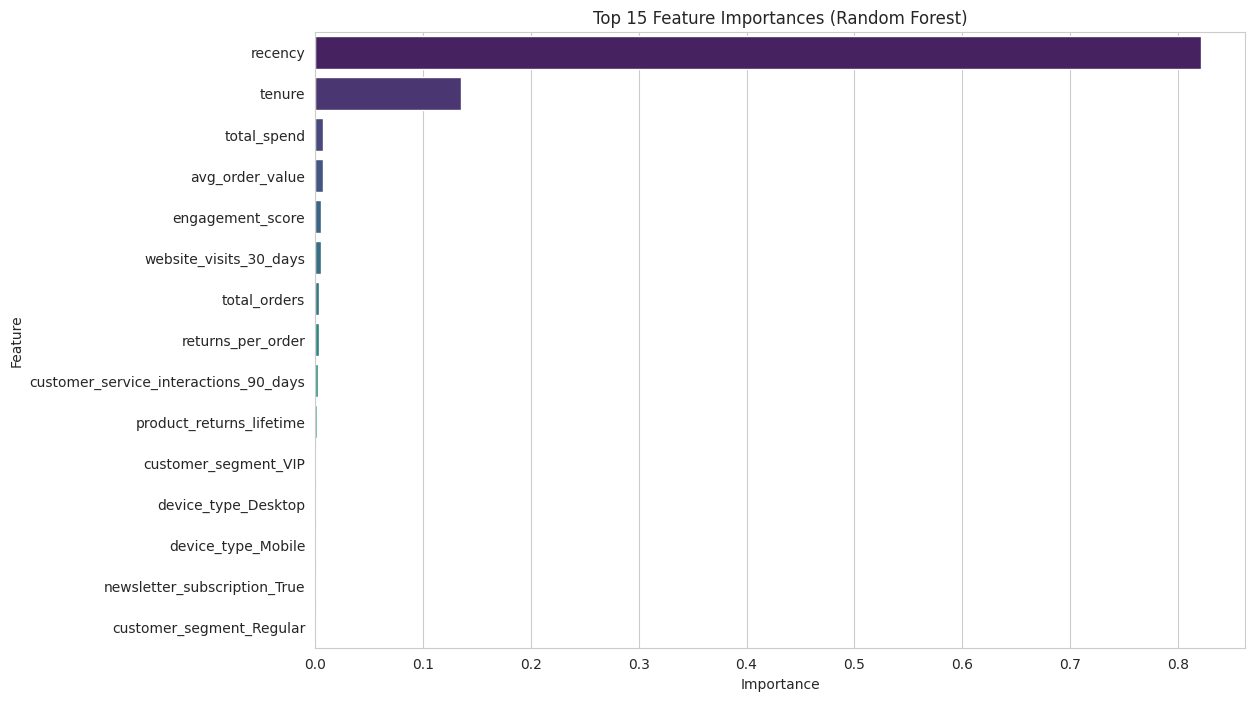

In [14]:
# Feature Importance for Random Forest (or Gradient Boosting)
# We need to get the feature names after one-hot encoding
ohe_feature_names = model_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

if isinstance(model_rf.named_steps['classifier'], (RandomForestClassifier, GradientBoostingClassifier)):
    feature_importances = model_rf.named_steps['classifier'].feature_importances_
    importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='viridis')
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Feature importance visualization is typically for tree-based models.")